In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
netflix = pd.read_csv('netflix_titles.csv.zip')
netflix.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [3]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [4]:
netflix_show = netflix[netflix.type=='TV Show'].fillna('Unknown')
netflix_movie = netflix[netflix.type=='Movie'].fillna('Unknown')

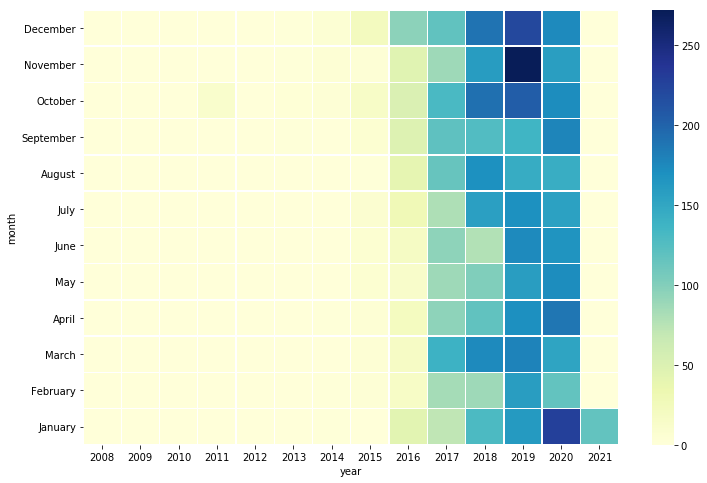

In [5]:
# number of contents added by month and year added
netflix_date = netflix[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip(' ').split(' ')[0]) # lstrip() This method is used to delete all the leading characters mentioned in its argument
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
count_by_year_month = netflix_date.groupby(['year','month']).size().unstack().fillna(0)[month_order].T

# print(count_by_year_month)
plt.figure(figsize=(12,8))
sns.heatmap(data=count_by_year_month,cmap="YlGnBu", linecolor='white', linewidths=0.4)


In [6]:
# number of movies and shows added over years
netflix_movie['year'] = netflix_movie['date_added'].apply(lambda x: np.nan if x == 'Unknown' else x.split(', ')[-1])
netflix_show['year'] = netflix_show['date_added'].apply(lambda x: np.nan if x == 'Unknown' else x.split(', ')[-1])
df_year_movie = netflix_movie.groupby('year')['show_id'].size().reset_index()
df_year_show = netflix_show.groupby('year')['show_id'].size().reset_index()
fig = go.Figure()
fig.add_trace(go.Line(x=df_year_movie.year, y=df_year_movie['show_id'],name='movie'))
fig.add_trace(go.Line(x=df_year_show.year, y=df_year_show['show_id'],name='show'))
fig.update_layout(barmode='stack',width=1200,height=400)
fig.show()

/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [7]:
netflix.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

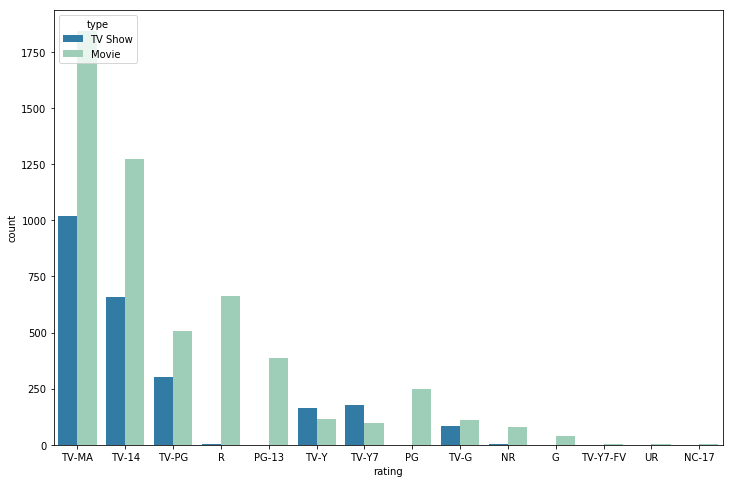

In [8]:
# number of movies and shows by rating
plt.figure(figsize=(12,8))
sns.countplot(data=netflix, x='rating', hue='type', palette='YlGnBu_r', order=netflix.rating.value_counts().index[:15])

Text(0.5, 1.0, 'show duration')

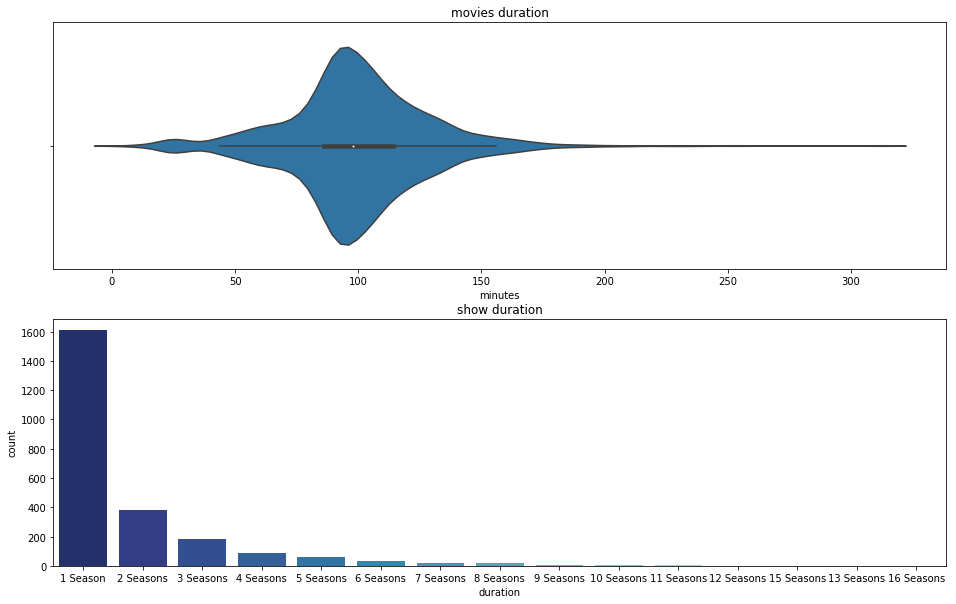

In [9]:
# distribution of duration of movies and shows
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,10), sharex=False)
netflix_movie['minutes'] = netflix_movie['duration'].apply(lambda x: int(x.split(' ')[0]))
# sns.distplot(netflix_movie['minutes'])
f1 = sns.violinplot(netflix_movie['minutes'], ax=axes[0])
f1.set_title('movies duration')
f2 = sns.countplot(x='duration',data=netflix_show, palette='YlGnBu_r', order=netflix_show.duration.value_counts().index)
f2.set_title('show duration')

In [10]:
netflix_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,minutes
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,123
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,95


In [11]:
def extract_genre(df):
    genres = {}
    for i in list(df['listed_in']):
        genre_list = i.split(',')
        if len(genre_list) == 1:
            if genre_list[0].strip() in genres.keys():
                genres[genre_list[0].strip()] += 1
            else:
                genres[genre_list[0].strip()] = 1
        else:
            for g in genre_list:
                if g.strip() in genres.keys():
                    genres[g.strip()] +=1
                else:
                    genres[g.strip()] = 1
    genres_clean = {k:v for k,v in genres.items() if k!=''}
    return genres_clean

In [12]:
genres_movie = extract_genre(netflix_movie)
genres_show = extract_genre(netflix_show)
df_genres_movie = pd.DataFrame.from_dict(genres_movie, orient='index',columns=['count']).reset_index().rename(columns={'index':'genre'}).sort_values('count',ascending=False)
df_genres_show = pd.DataFrame.from_dict(genres_show, orient='index',columns=['count']).reset_index().rename(columns={'index':'genre'}).sort_values('count',ascending=False)

from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],subplot_titles=['Movies genres', 'Shows genres'])
# fig = px.pie(df_genres_movie, values='count', names='genre', hover_data=['count'])
fig.add_trace(go.Pie(labels = df_genres_movie['genre'], values=df_genres_movie['count'], name='Movies genres'),1,1)
fig.add_trace(go.Pie(labels = df_genres_show['genre'], values=df_genres_show['count'], name='Shows genres'),1,2)
# fig.add_trace(px.pie(df_genres_show, values='count', names='genre',title='Shows genres'))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(width=1400,height=600,showlegend=False)
fig.show()

In [13]:
def extract_country(df):
    countries={}
    df['country'] = df.country.fillna('Unknown')
    for i in list(df['country']):
        country_list = i.split(',')
        if len(country_list)==1:
            if country_list[0].strip() in countries.keys():
                countries[country_list[0].strip()]+=1
            else:
                countries[country_list[0].strip()]=1
        else:
            for j in country_list:
                if j.strip() in countries.keys():
                    countries[j.strip()]+=1
                else:
                    countries[j.strip()]=1
#   countries

#   countries_fin={k: v for k, v in sorted(countries.items(), key=lambda item: item[1], reverse= True)}
    countries_clean = {k:v for k, v in countries.items() if k!='' }
    return countries_clean

In [14]:
countries_movie = extract_country(netflix_movie)
countries_show = extract_country(netflix_show)

df_countries_movie = pd.DataFrame.from_dict(countries_movie, orient='index',columns=['count']).reset_index().rename(columns={'index':'country'}).sort_values('count',ascending=False)
df_countries_show = pd.DataFrame.from_dict(countries_show, orient='index',columns=['count']).reset_index().rename(columns={'index':'country'}).sort_values('count',ascending=False)
# sns.barplot(x=list(countries_movie.keys())[:10], y=list(countries_movie.values())[:10])

In [15]:
# top 10 countires by contents
df_countries_content = pd.concat([df_countries_movie, df_countries_show]).groupby('country').agg({'count':sum}).reset_index().sort_values('count',ascending=False)
top10_countries_content = list(df_countries_content[df_countries_content['country']!='Unknown'].iloc[:10].country)


In [16]:
# shows and movies by countries (stack bar, scatter plot)
df_countries_movie_show = df_countries_movie.merge(df_countries_show, on='country', suffixes=('_movie','_show')).fillna(0)
df_plot = df_countries_movie_show[df_countries_movie_show['country'].isin(top10_countries_content)]

fig = go.Figure()
fig.add_trace(go.Bar(x=df_plot.country, y=df_plot['count_movie'],name='movie'))
fig.add_trace(go.Bar(x=df_plot.country, y=df_plot['count_show'],name='show'))
fig.update_layout(barmode='stack',width=1200,height=400,xaxis={'categoryorder':'total descending'})
fig.show()

fig1 = px.scatter(df_plot, x="count_movie", y="count_show", color="country", size=df_plot["count_movie"]+df_plot["count_show"], hover_data=['country'])
fig1.show()

In [17]:
# imdb_ratings = pd.read_csv('IMDb movies.csv', usecols=['imdb_title_id','weighted_average_vote'])
imdb_ratings = pd.read_csv('IMDb movies.csv', usecols=['title','genre','avg_vote'])
print(imdb_ratings.shape)
imdb_ratings.drop_duplicates(inplace=True)
print(imdb_ratings.shape)

(85855, 3)
(85844, 3)


In [18]:
netflix_movie.shape

(5377, 14)

In [19]:
netflix_movie_ratings = netflix_movie.merge(imdb_ratings,on='title').rename(columns={'avg_vote':'imdb_rating'}).sort_values('imdb_rating',ascending=False)
#half of movies have ratings on IMDb
# netflix_movie_ratings.head(15)

In [20]:
fig=px.sunburst(netflix_movie_ratings[0:15], path=['country','title'], values='imdb_rating', color='imdb_rating', color_continuous_scale='YlOrBr',hover_data={'country':False,'title':False})
# fig.update_layout(hover_info='imdb_rating')
fig.show()

In [14]:
# movie_count = netflix_movie[netflix_movie['country'].isin(top5countries_movie)].groupby('country').size().sort_values(ascending=False).reset_index()
# movie_count['type']='movie'
# show_count = netflix_show[netflix_show['country'].isin(top5countries_show)].groupby('country').size().sort_values(ascending=False).reset_index()
# show_count['type']='show'
# movie_show_country_count = pd.concat([movie_count,show_count])
# movie_show_country_count.columns=['country','count','type']

In [11]:
# movie_show_country_count_pivot = pd.pivot_table(movie_show_country_count[movie_show_country_count['country']!='other'], values='count', index='type', columns='country')
# fig = px.imshow(movie_show_country_count_pivot,
#                 # labels=dict(x="Day of Week", y="Time of Day", color="Productivity"),
#                 x=movie_show_country_count_pivot.columns,
#                 y=['movie','show']
#                )
# fig.update_xaxes(side="top")
# fig.show()

In [34]:
for k,v in zip(y_data,x_data):
    print(k,v)

movie [1850, 852, 193, 118, 89, 2275]
show [705, 204, 157, 147, 71, 1126]


In [66]:
colors = ['rgba(20,10,35,0.8)','rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']
x_data = [[1850,852,193,118,89,2275],[705,204,157,147,71,1126]]
# y_data = ['movie','show']
y_data = [0,1]
x_name = [['US','ID','UK','CA','Egypt','other'],['US','UK','JP','SK','ID','other']]

fig = go.Figure()
for i in range(len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(x = [xd[i]], y=[yd], 
        orientation = 'h',
        marker = dict(color=colors[i]), width=0.5
        ,hovertext=x_name[yd][i]
        ,hoverinfo="text"
        )
        )
annotations = []
for yd, xd in zip(y_data, x_data):
    annotations.append(dict(xref='x',yref='y',
                            x=xd[0]/2, y=yd+0.4,
                            text='US: '+str(xd[0]),
                            showarrow=False))

fig.update_layout(barmode='stack', showlegend=False,width=1200,height=400,
                annotations=annotations)
fig.show()

In [25]:
# fig = go.Figure(data=[
#     go.Bar(name='United States', y=['movie','show'], x=[1850,705],orientation='h'),
#     go.Bar(name='India', y=['movie','show'], x=[852,71],orientation='h'),
#     go.Bar(name='United Kingdom', y=['movie','show'], x=[193,204],orientation='h'),
#     go.Bar(name='Canada', y=['movie','show'], x=[118,0],orientation='h'),
#     go.Bar(name='Egypt', y=['movie','show'], x=[89,0],orientation='h'),
#     go.Bar(name='Japan', y=['movie','show'], x=[0,157],orientation='h'),
#     go.Bar(name='South Korea', y=['movie','show'], x=[0,147],orientation='h'),
# ])
# fig.update_layout(barmode='stack', showlegend=False,width=800,height=400)


# fig = px.bar(movie_show_country_count, y="type", x="count", color="country",orientation='h') setting color for each trace requires plotting those individually

fig.update_layout(showlegend=True,width=800,height=400)
# ,text='count'
# )
# fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')

fig.add_annotation(y='movie', x=1000,
            text="Text annotation with arrow",
            showarrow=False,
            # arrowhead=1
            )
fig.show()

In [ ]:
# # of shows and movies by countries